### Skeleton for HW5
Rename this file and place your code here.

**Note: If a cell begins with HW: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW. This also clearly delineates the sections for me.**

#### HW: For the preamble, leave any general comments here and load all needed modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import sympy as sp
from scipy.linalg import eigvals

### Part 1: Root Finding

**HW 5-1**: (scalar root finding) Assume the Redlich-Kwong equation of state for calculating the pressure as a function molar volume. 

$P = \frac{RT}{v-b} - \frac{a}{v(v+b)\sqrt{T}}$

For methane, $a$ and $b$ can be well estimated using the 
critical temperature ($T_c = 191$ K) and pressure ($P_c = 4580$ kPA).
\begin{eqnarray*}
a = \frac{0.427 R^2 T_c^{2.5}}{P_c} \\
b = \frac{0.0866RT_c}{P_c}
\end{eqnarray*}

a. Assume our standard operating pressure is 300 kPa. Find the smallest specific volume of gas with pressure < 300 kPa (units are m$^3$/kg) at 500 K. This helps us set the minimum size of our container. Use a method with brackets.

\begin{equation*}
P = \frac{RT}{v-b} - \frac{a}{v(v+b)\sqrt{T}} \\
\end{equation*}

\begin{equation*}
300 = \frac{RT}{v-b} - \frac{a}{v(v+b)\sqrt{T}} \\
\end{equation*}

\begin{equation*}
0 = \frac{RT}{v-b} - \frac{a}{v(v+b)\sqrt{T}} - 300
\end{equation*}

In [2]:
Tc = 191   # K
Pc = 4580  # kPa

""" according to the Redlich-Kwong EOS P function, b should have units of specific volume, which in this case would be m^3/kg.
    assume the coefficients in a and b terms are dimensionless.
    choose R = 8.314 L * kPa / mol / K but convert to m^3 * kPa / kg / K using methane's MW. """

R = 8.314/1000/16.04*1000  # kPa * m^3 / kg / K
a = 0.427*(R**2)*(Tc**2.5)/Pc
b = 0.0866*R*Tc/Pc

T = 500  # K
P = 300  # kPa

In [3]:
def f(v):
    return R*T/(v-b) - a/v/(v+b)/np.sqrt(T) - P # function we want to solve for

In [4]:
f(1) # checking to see that the function works, should be -40.9

-40.91307701812167

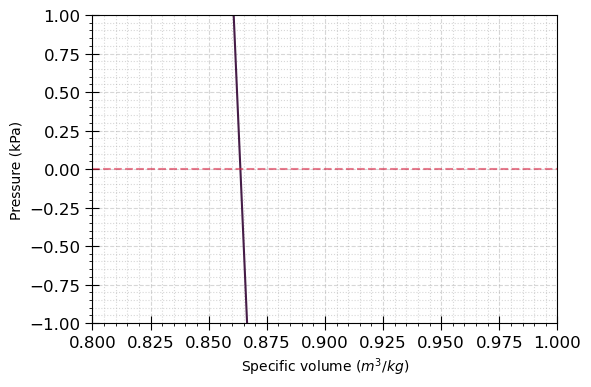

In [5]:
# plot the function, see it should have one solution around 0.86, use this to inform the brackets
fig, ax  = plt.subplots(figsize=(6,4))
colors=sns.color_palette("rocket",10)

x = np.linspace(0.001,1,100)
y = f(x)

ax.plot(x,y,color=colors[1])
ax.axhline(y=0, color=colors[5], linestyle='--', alpha=0.6)

ax.set_ylim(-1,1)
ax.set_xlim(0.8,1.0)
ax.set_xlabel('Specific volume ($m^3/kg$)')
ax.set_ylabel('Pressure (kPa)')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)
plt.show()

In [6]:
results = optimize.root_scalar(f, bracket=[0.5,1], method='bisect', xtol=10**-15)
print(results)

# results.root is the specific volume of gas for which pressure = 300 kPa at 500K

      converged: True
           flag: converged
 function_calls: 50
     iterations: 48
           root: 0.8635833796020744


In [7]:
def func(v):
    return R*T/(v-b) - a/v/(v+b)/np.sqrt(T)

In [8]:
# checking to make sure func(v) works properly, should = 12.958 at v = 20
func(20)

12.958030595497542

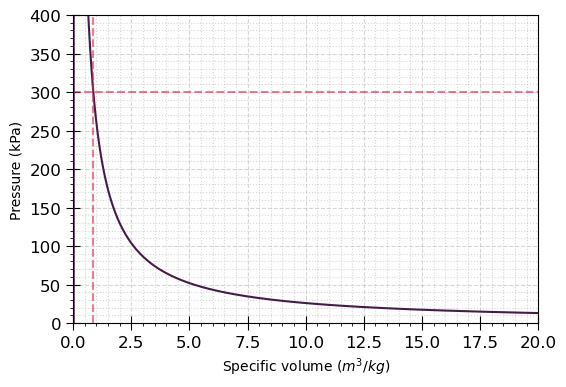

In [9]:
# plot the function, see it should have one solution around 0.86, use this to inform the brackets
fig, ax  = plt.subplots(figsize=(6,4))

x = np.linspace(0.001,20,1000)
y = func(x)

ax.plot(x,y,color=colors[1])
ax.axvline(x=results.root, color=colors[5], linestyle='--', alpha=0.6)
ax.axhline(y=300, color=colors[5], linestyle='--', alpha=0.6)

ax.set_ylim(0,400)
ax.set_xlim(0,20)
ax.set_xlabel('Specific volume ($m^3/kg$)')
ax.set_ylabel('Pressure (kPa)')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)
plt.show()

This plot directly above shows us that the result of f(v) = 300 is the smallest specific volume of gas for which pressure < 300 kPa at 500 K.

Find the smallest specific volume of gas with pressure < 300 kPa (units are m$^3$/kg) at 500 K. This helps us set the minimum size of our container. Use a method with brackets.

In [10]:
print(f'The smallest specific volume of gas with pressure < 300 kPa at 500 K is {results.root:.3f} m^3/kg')

The smallest specific volume of gas with pressure < 300 kPa at 500 K is 0.864 m^3/kg


b. Given this specific volume of gas, what is the maximum temperature we can have such that the pressure remains below 500 kPa? 

In [11]:
# fix v, now T is the variable
v = results.root  # m3/kg
P = 500  # kPa

In [12]:
def f(T):
    return R*T/(v-b) - a/v/(v+b)/np.sqrt(T) - P # function we want to solve for

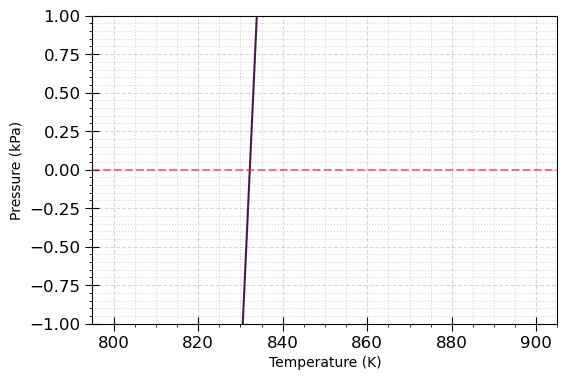

In [13]:
# plot the function, see it should have one solution around 832, use this to inform the brackets
fig, ax  = plt.subplots(figsize=(6,4))
colors=sns.color_palette("rocket",10)

x = np.linspace(800,900,100)
y = f(x)

ax.plot(x,y,color=colors[1])
ax.axhline(y=0, color=colors[5], linestyle='--', alpha=0.6)

ax.set_ylim(-1,1)
# ax.set_xlim(0.8,1.0)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (kPa)')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)
plt.show()

In [14]:
results = optimize.root_scalar(f, bracket=[820,840], method='bisect', xtol=10**-15)
print(results)

# results.root is the specific volume of gas for which pressure = 300 kPa at 500K

      converged: True
           flag: converged
 function_calls: 47
     iterations: 45
           root: 832.2133164009637


In [15]:
def func(T):
    return R*T/(v-b) - a/v/(v+b)/np.sqrt(T)

In [16]:
# checking to make sure func(T) works properly, should = 27.686 at T = 50
func(50)

27.68597649782899

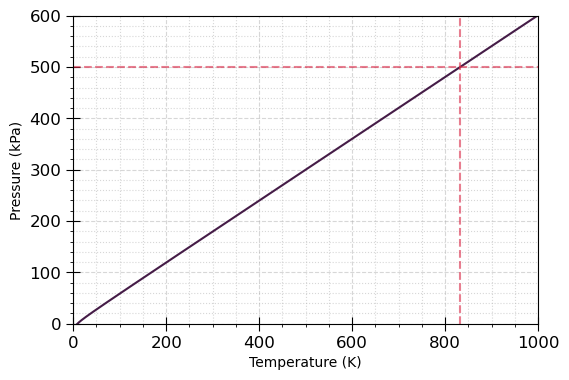

In [17]:
# plot the function, see it should have one solution around 0.86, use this to inform the brackets
fig, ax  = plt.subplots(figsize=(6,4))

x = np.linspace(0.001,1000,5000)
y = func(x)

ax.plot(x,y,color=colors[1])
ax.axvline(x=results.root, color=colors[5], linestyle='--', alpha=0.6)
ax.axhline(y=500, color=colors[5], linestyle='--', alpha=0.6)

ax.set_ylim(0,600)
ax.set_xlim(0,1000)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (kPa)')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)
plt.show()

From the graph directly above we can see that the maximum temperature for which the pressure remains below 500 kPa is 832.2 K. 

In [18]:
print(f'The maximum temperature for which the pressure remains below 500 kPa is {results.root:.3f} K.')

The maximum temperature for which the pressure remains below 500 kPa is 832.213 K.


**HW 5-2**: (solving simultaneous equations) You are given a continuously stirred tank reactor, operating isothermally with negligible volume change on reaction, with two chemical reactions occurring with stoichiometry:

\begin{eqnarray*}
A + B \rightarrow C \\
C + 2B \rightarrow D \\
\end{eqnarray*}

Where the rate of the first reaction is $r_{R1}=k_1 C_A C_B$, and the rate of the second reaction is $r_{R2} = k_2 C_B^2 C_C$.  There is a single inlet, single outlet, with volumetric flow $v$. The total volume is $V$.

We can set up the mass balances of the species to find that at steady state (accumulation = inflow - outflow + creation - destruction = 0) is: 
\begin{eqnarray*}
0 &=& vC_{A,in} - vC_A - k_1 V C_A C_B \\
0 &=& vC_{B,in} - vC_B - k_2 V C_B^2 C_C - k_1 V C_A C_B \\
0 &=& vC_{C,in} - vC_C + k_1 V C_A C_B - k_2 V C_B^2 C_C \\
0 &=& vC_{D,in} - vC_D + k_2 V C_B^2 C_C \\
\end{eqnarray*} 

a. Solve for the steady state when concentration in the inlet flow is $[C_{A,in},C_{B,in},C_{C,in},C_{D,in}] = [0.1,0.1,0,0]$ mol/L, $k_1 = 2$ L mol$^{-1}$ s$^{-1}$, $k_2 = 0.5$ L$^2$ mol$^{-2}$ s$^{-1}$, $v=5$ L/s, and $V = 100$ L.  

In [19]:
k1 = 2       # L/mol/s
k2 = 0.5     # L2/mol2/s
v = 5        # L/s
Vol = 100    # L
C_Ain = 0.1  # mol/L
C_Bin = 0.1  # mol/L
C_Cin = 0    # mol/L
C_Din = 0    # mol/L

In [20]:
def func(q, k2, v):
    # q[0] = C_A
    # q[1] = C_B
    # q[2] = C_C
    # q[3] = C_D
    return [v*C_Ain-v*q[0]-k1*Vol*q[0]*q[1], v*C_Bin-v*q[1]-k2*Vol*q[1]**2*q[2]-k1*Vol*q[0]*q[1], v*C_Cin-v*q[2]+k1*Vol*q[0]*q[1]-k2*Vol*q[1]**2*q[2], v*C_Din-v*q[3]+k2*Vol*q[1]**2*q[2]]

In [21]:
root = optimize.fsolve(func, [2,2,2,2], args=(k2, v), xtol=1e-10, full_output=True)
print(root[0])

[0.03937581 0.03849075 0.05973913 0.00088506]


b. Plot the two cases of steady-state concentrations as a function of rate $k_2$, and of the flow $v$, in both cases leaving all other concentrations the same as a.

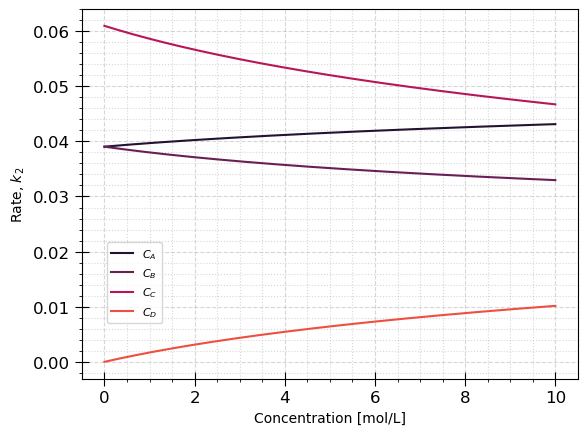

In [22]:
k2_array = np.linspace(0.00001,10,500)
ssConcs = []

for k2 in k2_array:
    root = optimize.fsolve(func, [2,2,2,2], args=(k2, v), xtol=1e-10, full_output=True)
    ssConcs.append(root[0])

ssConcs = np.array(ssConcs)

fig, ax = plt.subplots()

ax.plot(k2_array, ssConcs[:, 0], color=colors[0], label='$C_A$')
ax.plot(k2_array, ssConcs[:, 1], color=colors[2], label='$C_B$')
ax.plot(k2_array, ssConcs[:, 2], color=colors[4], label='$C_C$')
ax.plot(k2_array, ssConcs[:, 3], color=colors[6], label='$C_D$')

ax.set_ylabel("Rate, $k_2$")
ax.set_xlabel("Concentration [mol/L]")

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
plt.tick_params(direction='inout', length=10, labelsize=12)
plt.legend(loc=(.05,.15), fontsize=8)

plt.show()

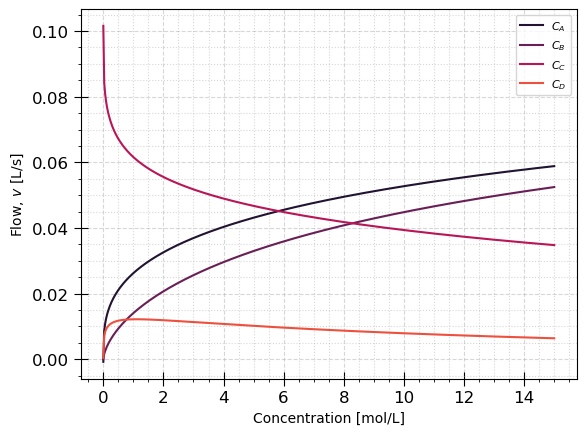

In [23]:
v_array = np.linspace(0.00001,15,500)
ssConcs = []

for v in v_array:
    root = optimize.fsolve(func, [2,2,2,2], args=(k2, v), xtol=1e-10, full_output=True)
    ssConcs.append(root[0])

ssConcs = np.array(ssConcs)

fig, ax = plt.subplots()

ax.plot(v_array, ssConcs[:, 0], color=colors[0], label='$C_A$')
ax.plot(v_array, ssConcs[:, 1], color=colors[2], label='$C_B$')
ax.plot(v_array, ssConcs[:, 2], color=colors[4], label='$C_C$')
ax.plot(v_array, ssConcs[:, 3], color=colors[6], label='$C_D$')

ax.set_ylabel("Flow, $v$ [L/s]")
ax.set_xlabel("Concentration [mol/L]")

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
plt.tick_params(direction='inout', length=10, labelsize=12)
plt.legend(loc='upper right', fontsize=8)

plt.show()

**HW 5-3**: (single variable optimization) We are interested in finding the nutrient level that will maximize the growth of a strain of yeast. We are given that the growth rate $r$ as a function of the concentration of nutrients $c$ is:

$r(c) = \frac{2c}{4+0.8c+1.0c^2+0.2c^3}$

Find the maximum rate using methods `brent` and `golden` with `minimize_scalar`, and `Nelder-Mead`, `BFGS`, and `Newton-CG` with `minimize`, and compare the number of function evaluations used. 

In [24]:
def r(c):
    return 2*c/(4+0.8*c+2.0*(c**2)+0.2*(c**3))

def negative_r(c):
    return -2*c/(4+0.8*c+2.0*(c**2)+0.2*(c**3))

In [25]:
### CREDIT TO CHAT GPT FOR THE IDEA TO USE SYMPY TO CALCULATE THE JACOBIAN

c = sp.symbols('c')
r4jac = -2*c/(4+0.8*c+2.0*(c**2)+0.2*(c**3))
jac = sp.diff(r4jac, c)

# print(jac)

def fjac(c): # use the jac found by sympy to be the jacobian
    return -c*(-0.6*c**2 - 4.0*c - 0.8)/(8*(0.05*c**3 + 0.5*c**2 + 0.2*c + 1)**2) - 2/(0.2*c**3 + 2.0*c**2 + 0.8*c + 4)

In [26]:
c_max_brent = optimize.minimize_scalar(negative_r, bracket=[0,6], tol=10**-8, method='brent')
c_max_golden = optimize.minimize_scalar(negative_r, bracket=[0,6], tol=10**-8, method='golden')

c_max_NelderMead = optimize.minimize(negative_r, 0.2, method='Nelder-Mead', tol=10**-8)
c_max_BFGS = optimize.minimize(negative_r, 0.2, method='BFGS', tol=10**-8)

# jacobian is required for Newton-CG method
c_max_NewtonCG = optimize.minimize(negative_r, 0.2, jac=fjac, method='Newton-CG', tol=10**-8)

# print(f'The maximum growth rate found using the brent method of minimize_scalar is{r(c_max_brent.x): .3f} at c ={c_max_brent.x: .3f} [concentration]. This method utilized {c_max_brent.nfev} function evaluations.')
# print(f'The maximum growth rate found using the golden method of minimize_scalar is{r(c_max_golden.x): .3f} at c ={c_max_golden.x: .3f} [concentration]. This method utilized {c_max_golden.nfev} function evaluations.')
# print(f'The maximum growth rate found using the Nelder-Mead method of minimize is{r(c_max_NelderMead.x[0]): .3f} at c ={c_max_NelderMead.x[0]: .3f} [concentration].  This method utilized {c_max_NelderMead.nfev} function evaluations.')
# print(f'The maximum growth rate found using the BFGS method of minimize is{r(c_max_BFGS.x[0]): .3f} at c ={c_max_BFGS.x[0]: .3f} [concentration].  This method utilized {c_max_BFGS.nfev} function evaluations.')
# print(f'The maximum growth rate found using the Newton-CG method of minimize is{r(c_max_NewtonCG.x[0]): .3f} at c ={c_max_NewtonCG.x[0]: .3f} [concentration].  This method utilized {c_max_NewtonCG.nfev} function evaluations.')

In [27]:
# define the headers for the table, add in | to separate the columns, and generate the full, center-aligned header
headers = ['   Method   ',' Optimal Nutrient Level ',' (Max.) Growth Rate ',' Number of Function Evaluations ']
methods = ['Brent', 'Golden', 'Nelder-Mead', 'BFGS', 'Newton-CG']
aligned_headers = "|"
for header in headers: aligned_headers += f' {header: ^} |'

# add a line of --- characters to separate the headers from the table values

dividers = ""
for char in range(len(aligned_headers)): dividers += "-"

# print the dividers and headers
print(dividers + "\n" + aligned_headers + "\n" + dividers)

print(f'| {methods[0]: ^{len(headers[0])}} | {c_max_brent.x: ^{len(headers[1])}.3f} | {r(c_max_brent.x): ^{len(headers[2])}.3f} | {c_max_brent.nfev: ^{len(headers[3])}} |')
print(f'| {methods[1]: ^{len(headers[0])}} | {c_max_golden.x: ^{len(headers[1])}.3f} | {r(c_max_golden.x): ^{len(headers[2])}.3f} | {c_max_golden.nfev: ^{len(headers[3])}} |')
print(f'| {methods[2]: ^{len(headers[0])}} | {c_max_NelderMead.x[0]: ^{len(headers[1])}.3f} | {r(c_max_NelderMead.x[0]): ^{len(headers[2])}.3f} | {c_max_NelderMead.nfev: ^{len(headers[3])}} |')
print(f'| {methods[3]: ^{len(headers[0])}} | {c_max_BFGS.x[0]: ^{len(headers[1])}.3f} | {r(c_max_BFGS.x[0]): ^{len(headers[2])}.3f} | {c_max_BFGS.nfev: ^{len(headers[3])}} |')
print(f'| {methods[4]: ^{len(headers[0])}} | {c_max_NewtonCG.x[0]: ^{len(headers[1])}.3f} | {r(c_max_NewtonCG.x[0]): ^{len(headers[2])}.3f} | {c_max_NewtonCG.nfev: ^{len(headers[3])}} |')

-----------------------------------------------------------------------------------------------------
|    Method    |  Optimal Nutrient Level  |  (Max.) Growth Rate  |  Number of Function Evaluations  |
-----------------------------------------------------------------------------------------------------
|    Brent     |          1.264           |        0.294         |                19                |
|    Golden    |          1.264           |        0.294         |                48                |
| Nelder-Mead  |          1.264           |        0.294         |                65                |
|     BFGS     |          1.264           |        0.294         |                18                |
|  Newton-CG   |          1.264           |        0.294         |                5                 |


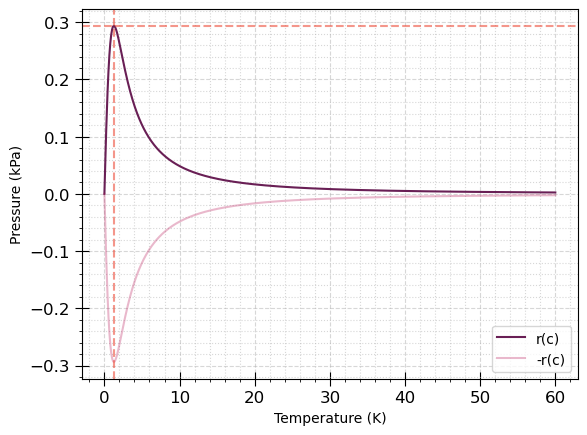

In [28]:
fig, ax  = plt.subplots()
c = np.linspace(0, 60, 1000)

ax.plot(c, r(c), color=colors[2], label='r(c)')
ax.plot(c, negative_r(c), color=colors[4], label='-r(c)', alpha=0.3) # find the minimum of -r(c)
ax.axvline(x=c_max_brent.x, color=colors[6], linestyle='--', alpha=0.6)
ax.axhline(y=r(c_max_brent.x), color=colors[6], linestyle='--', alpha=0.6)


ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (kPa)')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)

plt.legend()

**HW 5-4**: (properties of multidimensional optimization) 

a. Find a maximum of the function:

$f(x,y,z) = 5x−5y +x^3 −x^8 +2xy−3y^2 −2z^2 −x^2z$

with approximate relative error to within a tolerance of $10^{−8}$. Report the value of the point $[x, y, z]$ and the value of $f$ at this point, the value of the gradient at the point, and proof that the point is indeed a maximum. Use $[2,1,0]$ as the initial point. Use Nelder-Mead, BFGS, and Newton-CG approaches.

In [29]:
def f(x): 
    '''The function given in part a of HW6 Problem 5-4'''
    # x[0] = x
    # x[1] = y
    # x[2] = z
    return (5*x[0]-5*x[1]+x[0]**3-x[0]**8+2*x[0]*x[1]-3*x[1]**2-2*x[2]**2-x[0]**2*x[2])

def negf(x):
    '''The function given in part a of HW6 Problem 5-4'''
    # x[0] = x
    # x[1] = y
    # x[2] = z
    return -(5*x[0]-5*x[1]+x[0]**3-x[0]**8+2*x[0]*x[1]-3*x[1]**2-2*x[2]**2-x[0]**2*x[2])

### CREDIT TO CHAT GPT FOR THE IDEA TO USE SYMPY TO CALCULATE THE JACOBIAN

x, y, z = sp.symbols('x y z')
f4jac = -(5*x-5*y+x**3-x**8+2*x*y-3*y**2-2*z**2-x**2*z)
jac = sp.Matrix([f4jac.diff(x), f4jac.diff(y), f4jac.diff(z)])

# print(jac)

def fjac(x):
    return np.array([8*x[0]**7 - 3*x[0]**2 + 2*x[0]*x[2] - 2*x[1] - 5, -2*x[0] + 6*x[1] + 5, x[0]**2 + 4*x[2]])

### CREDIT TO CHAT GPT FOR THE IDEA TO USE SYMPY TO CALCULATE THE HESSIAN

x, y, z = sp.symbols('x y z')
f4hess = -(5*x-5*y+x**3-x**8+2*x*y-3*y**2-2*z**2-x**2*z)
hess = sp.hessian(f4hess, (x, y, z))

# print(hess)

def fhess(x): # use the hessian found by sympy to be the hessian
    return np.array([[56*x[0]**6 - 6*x[0] + 2*x[2], -2, 2*x[0]], [-2, 6, 0], [2*x[0], 0, 4]])

# results_NelderMead = optimize.minimize(negf, [2,1,0], method='Nelder-Mead', jac=fjac, hess=fhess, tol=10**-8);
# results_BFGS = optimize.minimize(negf, [2,1,0], method='BFGS', jac=fjac, hess=fhess, tol=10**-8);
# results_NewtonCG = optimize.minimize(negf, [2,1,0], method='Newton-CG', jac=fjac, hess=fhess, tol=10**-8);

In [30]:
%%time
results_NelderMead = optimize.minimize(negf, [2,1,0], method='Nelder-Mead', jac=fjac, hess=fhess, tol=10**-8);

CPU times: user 8.91 ms, sys: 1.89 ms, total: 10.8 ms
Wall time: 9.3 ms


/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method Nelder-Mead does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


In [31]:
%%time
results_BFGS = optimize.minimize(negf, [2,1,0], method='BFGS', jac=fjac, hess=fhess, tol=10**-8);

CPU times: user 2.1 ms, sys: 962 µs, total: 3.06 ms
Wall time: 2.37 ms


/Applications/anaconda3/envs/chen5838/lib/python3.11/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


In [32]:
%%time
results_NewtonCG = optimize.minimize(negf, [2,1,0], method='Newton-CG', jac=fjac, hess=fhess, tol=10**-8);

CPU times: user 2.49 ms, sys: 1.57 ms, total: 4.06 ms
Wall time: 2.64 ms


In [33]:
### CREDIT TO CHAT GPT FOR THE IDEA TO USE SYMPY TO CALCULATE THE JACOBIAN

x, y, z = sp.symbols('x y z')
f4jac = (5*x-5*y+x**3-x**8+2*x*y-3*y**2-2*z**2-x**2*z)
jac = sp.Matrix([f4jac.diff(x), f4jac.diff(y), f4jac.diff(z)])

# print(jac)

def fjac(x):
    return np.array([[-8*x[0]**7 + 3*x[0]**2 - 2*x[0]*x[2] + 2*x[1] + 5], [2*x[0] - 6*x[1] - 5], [-x[0]**2 - 4*x[2]]])

gradient_NelderMead = fjac([results_NelderMead.x[0],results_NelderMead.x[1],results_NelderMead.x[2]])
gradient_BFGS = fjac([results_BFGS.x[0],results_BFGS.x[1],results_BFGS.x[2]])
gradient_NewtonCG = fjac([results_NewtonCG.x[0],results_NewtonCG.x[1],results_NewtonCG.x[2]])

In [34]:
# define the headers for the table, add in | to separate the columns, and generate the full, center-aligned header
headers = ['      Method       ','   Max. Point [x,y,z]   ',' Max. Value ','           Gradient Value          ']
methods = ['Nelder-Mead', 'BFGS', 'Newton-CG']
aligned_headers = "|"
for header in headers: aligned_headers += f' {header: ^} |'

# add a line of --- characters to separate the headers from the table values

dividers = ""
for char in range(len(aligned_headers)): dividers += "-"

# print the dividers and headers
print(dividers + "\n" + aligned_headers + "\n" + dividers)

print(f'| {methods[0]: ^{len(headers[0])}} |  [{results_NelderMead.x[0]:.3f},{results_NelderMead.x[1]:.3f},{results_NelderMead.x[2]:.3f}]   | {f([results_NelderMead.x[0],results_NelderMead.x[1],results_NelderMead.x[2]]): ^{len(headers[2])}.3f} |     [{gradient_NelderMead[0,0]:.5f},{gradient_NelderMead[1,0]:.5f},{gradient_NelderMead[2,0]:.5f}]      |')
print(f'| {methods[1]: ^{len(headers[0])}} |  [{results_BFGS.x[0]:.3f},{results_BFGS.x[1]:.3f},{results_BFGS.x[2]:.3f}]   | {f([results_BFGS.x[0],results_BFGS.x[1],results_BFGS.x[2]]): ^{len(headers[2])}.3f} |     [{gradient_BFGS[0,0]:.5f},{gradient_BFGS[1,0]:.5f},{gradient_BFGS[2,0]:.5f}]       |')
print(f'| {methods[2]: ^{len(headers[0])}} |  [{results_NewtonCG.x[0]:.3f},{results_NewtonCG.x[1]:.3f},{results_NewtonCG.x[2]:.3f}]   | {f([results_NewtonCG.x[0],results_NewtonCG.x[1],results_NewtonCG.x[2]]): ^{len(headers[2])}.3f} |     [{gradient_NewtonCG[0,0]:.5f},{gradient_NewtonCG[1,0]:.5f},{gradient_NewtonCG[2,0]:.5f}]     |')

-------------------------------------------------------------------------------------------------------
|       Method        |    Max. Point [x,y,z]    |  Max. Value  |            Gradient Value           |
-------------------------------------------------------------------------------------------------------
|     Nelder-Mead     |  [0.989,-0.504,-0.245]   |    5.878     |     [0.00000,0.00000,-0.00000]      |
|        BFGS         |  [0.989,-0.504,-0.245]   |    5.878     |     [0.00000,0.00000,0.00000]       |
|      Newton-CG      |  [0.989,-0.504,-0.245]   |    5.878     |     [-0.00000,0.00000,-0.00000]     |


In the table directly  above, we can see that the gradient is zero at this point. Thus, this point is either a maximum or a minimum of the given function. We can confirm it's a maximum if the [hessian's eigenvalues are all negative](https://web.stanford.edu/group/sisl/k12/optimization/MO-unit4-pdfs/4.10applicationsofhessians.pdf).

In [35]:
x, y, z = sp.symbols('x y z')
f4hess = (5*x-5*y+x**3-x**8+2*x*y-3*y**2-2*z**2-x**2*z)
hess = sp.hessian(f4hess, (x, y, z))


def fhess(x): # use the hessian found by sympy to be the hessian
    return np.array([[-56*x[0]**6 + 6*x[0] - 2*x[2], 2, -2*x[0]], [2, -6, 0], [-2*x[0], 0, -4]])

hess_NelderMead = fhess([results_NelderMead.x[0],results_NelderMead.x[1],results_NelderMead.x[2]])
hess_BFGS = fhess([results_BFGS.x[0],results_BFGS.x[1],results_BFGS.x[2]])
hess_NewtonCG = fhess([results_NewtonCG.x[0],results_NewtonCG.x[1],results_NewtonCG.x[2]])

eigenvals_NelderMead = eigvals(hess_NelderMead)
eigenvals_BFGS = eigvals(hess_BFGS)
eigenvals_NewtonCG = eigvals(hess_NewtonCG)

is_max_NelderMead = np.any(eigenvals_NelderMead < 0)
is_max_BFGS = np.any(eigenvals_BFGS < 0)
is_max_NewtonCG = np.any(eigenvals_NewtonCG < 0)

print(is_max_NelderMead)
print(is_max_BFGS)
print(is_max_NewtonCG)

True
True
True


Since the eigenvalues are all negative then we can conclude that this point is a local maximum.

b. Estimate the computational cost of the three approaches. You can assume that the gradient costs approximately 3 times as much as a functional evaluation, and a Hessian costs 9 times as much as a function evaluatlion. Assume any linear algebra takes negligible time. Check using timing commands to compare to the estimate. 

In [36]:
# Nelder-Mead calculations
nfev_NelderMead = results_NelderMead.nfev
njev_NelderMead = 0  # Nelder-Mead does not evaluate the jacobian
nhev_NelderMead = 0  # Nelder-Mead does not evaluate the hessian

# BFGS calculations
nfev_BFGS = results_BFGS.nfev
njev_BFGS = results_BFGS.njev 
nhev_BFGS = 0  # BFGS does not evaluate the hessian

# Newton-CG calculations
nfev_NewtonCG = results_NewtonCG.nfev
njev_NewtonCG = results_NewtonCG.njev
nhev_NewtonCG = results_NewtonCG.nhev

cost_NelderMead = nfev_NelderMead + 3*njev_NelderMead + 9*nhev_NelderMead
cost_BFGS = nfev_BFGS + 3*njev_BFGS + 9*nhev_BFGS
cost_NewtonCG = nfev_NewtonCG + 3*njev_NewtonCG + 9*nhev_NewtonCG

print(cost_NelderMead)
print(cost_BFGS)
print(cost_NewtonCG)

### times measured above, write something about them here

346
48
143


Can see above that Nelder Mead is the most computationally expensive, followed by Newton-CG and then BFGS. Is is in line with the times measured running each method - at the time of writing this, the time for the methods to run were as follows:

Nelder Mead
- CPU times: user 8.7 ms, sys: 1.66 ms, total: 10.4 ms
- Wall time: 9.85 ms
 
BFGS
- CPU times: user 1.84 ms, sys: 1.38 ms, total: 3.23 ms
- Wall time: 1.93 ms

Newton-CG
- CPU times: user 2.79 ms, sys: 1.72 ms, total: 4.52 ms
- Wall time: 3 ms

**HW 5-5**: (Complex, real life optimizations): The cost of refined oil when shipped via the Malacca Straits to Japan in dollars per kiloliter was estimated (Uchiyama, 1968) as the
  linear sum of the crude oil cost, the insurance, customs, freight
  cost for the oil, loading and unloading cost, sea berth cost,
  submarine pipe cost, storage cost, tank area cost, refining cost,
  and freight cost of products as:
\begin{eqnarray*} 
f &=&  c_c + c_i + c_x + 580.6 t^{-0.3017}  + 56.33 \frac{at^{-0.4925}}{q} + \\ 
 & & 2.245 \frac{at^{0.7952}}{q} + 0.000096\frac{ip(nt+1.2q)^{0.861}}{q} +  \\
 & & 0.225 \frac{a(nt+1.2q)}{q} + 14.0q^{-0.1899} + 0.000291 q^{0.671}
\end{eqnarray*}
Where: 


variable | value | description
-------| --------| -------------
$c_i$ | 16.40 | insurance cost \$/kL 
$c_c$ | 570 | crude oil price \$/kL 
$c_x$ | 22.15 | customs cost \$/kL 
$a$ | 0.20 | annual fixed charge fraction 
$i$ | 0.03 | interest rate 
$n$ | 2    | number of ports 
$p$ | 70,000 | land price (\$/m^2)  
$q$ |  ? | Refinery capacity, bbl/day 
$t$ |  ? | Tanker size, kL |


Given these values, compute the minimum cost of refined oil and the
optimum tanker size $t$ and refinery size $q$ using any scipy method (note that 1 kL = 6.29 bbl).  Plot the minimum as a function of $t$ and $q$ around the obtained minimum.

In [37]:
def oilCost(x):
    """..."""
    ci = 16.40  # insurance cost ($ per kL)
    cc = 570    # crude oil price ($ per kL)
    cx = 22.15  # customs cost ($ per kL)
    a = 0.20    # annual fixed charge fraction
    i = 0.03    # interest rate
    n = 2       # number of ports
    p = 70000   # land price ($ per square meter)

    # t = x[0]
    # q = x[1]
    return cc + ci + cx + 580.6*(x[0]**(-0.3017))+56.33*a*(x[0]**(-0.4925))/x[1]+2.245*a*(x[0]**(0.7952))/x[1]+0.000096*i*p*(n*x[0]+1.2*x[1])**(0.861)/x[1]+0.225*a*(n*x[0]+1.2*x[1])/x[1]+14.0*(x[1]**(-0.1899))+0.000291*x[1]**(0.671)

In [38]:
results = optimize.minimize(oilCost,[500,500],method='L-BFGS-B')
print(results)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 622.2960566070609
        x: [ 5.539e+05  2.153e+05]
      nit: 18
      jac: [ 0.000e+00  0.000e+00]
     nfev: 129
     njev: 43
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


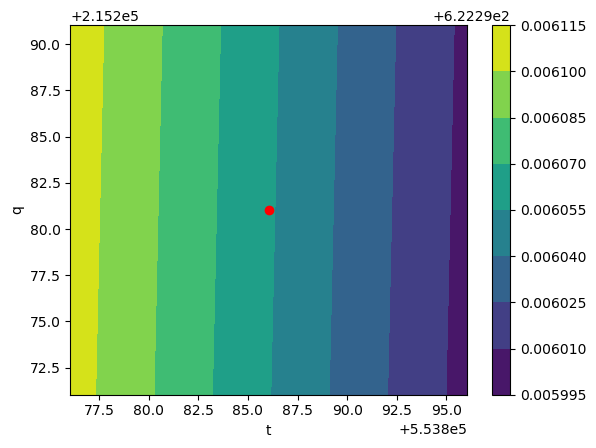

In [39]:
optimum_t = results.x[0]
optimum_q = results.x[1]

t,q = np.meshgrid(np.linspace(optimum_t-10, optimum_t+10, 100), np.linspace(optimum_q-10, optimum_q+10, 100))
z = oilCost([t, q])

contour = plt.contourf(t,q,z,)
plt.plot(optimum_t, optimum_q, color='r', marker='o')
plt.colorbar(contour)
plt.xlabel('t')
plt.ylabel('q')
plt.show()

- I have no idea why the contour plot is showing that the minimum is not actually a minimum. I've tried troubleshooting this but I cannot seem to get it to line up, I'm not sure if it's a units issue or maybe a function entry error or what. I think it has to do with the settings / execution in creating the colormap for the contour plot. When I treid the approach in lecture I just got a blue plot (no depth levels evident. Thus, I tried this approach which had worked for a friend but as you can see it's not accurately showing the cost levels for the function. 